# Import libraries

Pandas will be used to to work with the DataFrames. Matplotlib and seaborn are libraries that allows us plot charts and graphics.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


We open an csv file, with a determined Cryptocurrency historical data edited, with a determined sequence (ten previous candles and ten subsequent). Also have the technical indicators.
In this case, we'll use BTCUSDT ADAUSDT XMRUSDT ETHUSDT BNBUSDT, downloaded with **call_bina.py** as follows:

**call_bina.py ADAUSDT base 2021 2 2 30m**

It means, ADAUSDT Cryptocurrency historical data, since 2021 february 2nd with a interval of 30m. Done this for each case

In [4]:
file = pd.read_csv(f"analysis/analysis_2022-08-30_13_29.csv")


In [5]:
file.head()
file.columns

Index(['Unnamed: 0', 'volume_0', 'mart_0', 'mart_inv_0', 'ampl_2_0', 'rsi_0',
       'macd_0', 'macd_h0', 'macd_s0', 'volume_1', 'mart_1', 'mart_inv_1',
       'ampl_2_1', 'rsi_1', 'macd_1', 'macd_h1', 'macd_s1', 'volume_2',
       'mart_2', 'mart_inv_2', 'ampl_2_2', 'rsi_2', 'macd_2', 'macd_h2',
       'macd_s2', 'volume_3', 'mart_3', 'mart_inv_3', 'ampl_2_3', 'rsi_3',
       'macd_3', 'macd_h3', 'macd_s3', 'volume_4', 'mart_4', 'mart_inv_4',
       'ampl_2_4', 'rsi_4', 'macd_4', 'macd_h4', 'macd_s4', 'volume_5',
       'mart_5', 'mart_inv_5', 'ampl_2_5', 'rsi_5', 'macd_5', 'macd_h5',
       'macd_s5', 'volume_6', 'mart_6', 'mart_inv_6', 'ampl_2_6', 'rsi_6',
       'macd_6', 'macd_h6', 'macd_s6', 'volume_7', 'mart_7', 'mart_inv_7',
       'ampl_2_7', 'rsi_7', 'macd_7', 'macd_h7', 'macd_s7', 'date',
       'slope_prev', 'slope_prev_short', 'slope_next_short', 'high', 'low',
       'close', 'mean_rel_15_30', 'mean_rel_30_60', 'mean_rel_60_100'],
      dtype='object')

 Here we make an quick analisis of the data

In [11]:
#file.describe()
file.head()

,Unnamed: 0,volume_0,mart_0,mart_inv_0,ampl_2_0,rsi_0,macd_0,macd_h0,macd_s0,volume_1,...,date,slope_prev,slope_prev_short,slope_next_short,high,low,close,mean_rel_15_30,mean_rel_30_60,mean_rel_60_100
0,0,0.559239,-2.003618,1.995518,10008.463067,64.265386,46.320660,2.656183,43.664477,0.670405,...,2018-05-05 15:00:00,5.381599,4.957143,-21.930,0.000219,-0.009831,-0.003691,1.004445,1.008128,1.006181
1,1,0.736940,38.076652,-37.846821,9990.291392,57.421162,43.186516,-0.382369,43.568885,0.560201,...,2018-05-05 15:30:00,5.359957,2.146429,4.755,0.004119,-0.006041,0.001097,1.004792,1.008466,1.005942
2,2,1.309435,5.882089,-5.840631,9994.584301,56.425154,39.772169,-3.037373,42.809542,0.733832,...,2018-05-05 16:00:00,5.313321,0.054643,17.435,0.004711,-0.002332,0.000943,1.005046,1.008803,1.005782
3,3,0.596795,-13.656176,13.608362,9974.422511,58.462438,37.869166,-3.952301,41.821467,1.309108,...,2018-05-05 16:30:00,5.268838,-1.700000,-18.750,0.003158,-0.009004,-0.002431,1.005066,1.009118,1.005606
4,4,0.502350,-19.552191,19.486754,9992.452163,60.959244,37.503005,-3.454769,40.957774,0.597466,...,2018-05-05 17:00:00,5.229949,1.025714,-37.005,0.000574,-0.010946,-0.006738,1.005166,1.009148,1.005491


To see if is there a correlation we need to make a grapf
file_x is a list with names of the columns that we want to graph

In [7]:
file_x = [file[[f"rsi_{x}",f"mart_{x}","slope_prev_short",f"volume_{x}",f"macd_s{x}",f"macd_{x}","mean_rel_30_60","mean_rel_60_100","mean_rel_15_30","high"]] for x in range(0,6)]


In [114]:
file_1 = file
file_1 = file[file["close"] < .1]
file_1 = file_1[file_1["close"] > -.1]
file_1 = file_1[file_1["high"] < .15]
file_1 = file_1[file_1["macd_h0"] < .2] 
file_1 = file_1[file_1["macd_h0"] > -.05]
file_1 = file_1[file_1["macd_s1"] < 0]
#file_1 = file_1[file_1["macd_1"] < 0]
file_1 = file_1[file_1["volume_0"] < 10]
file_1 = file_1[file_1["rsi_0"] < 30]
file_1 = file_1[file_1["mart_0"] < 0.1]
file_1 = file_1[file_1["mart_0"] > -0.2]
file_1 = file_1[file_1["slope_prev_short"] > -0.1]
file_1 = file_1[file_1["slope_prev"] > -0.005]
file_1 = file_1[file_1["slope_prev"] < 0.01]
file_1.describe()

,Unnamed: 0,volume_0,mart_0,mart_inv_0,ampl_2_0,rsi_0,macd_0,macd_h0,macd_s0,volume_1,...,macd_s7,slope_prev,slope_prev_short,slope_next_short,high,low,close,mean_rel_15_30,mean_rel_30_60,mean_rel_60_100
count,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,...,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000
mean,293909.118182,1.908511,0.009666,-0.009394,2.307431,25.905360,-0.028189,-0.006527,-0.021662,1.786978,...,-0.012827,-0.000319,-0.008558,-0.000219,0.016018,-0.017630,0.001445,0.985763,0.987381,0.994513
std,131278.236385,1.482602,0.020823,0.020262,5.376484,3.466476,0.061708,0.009262,0.057185,1.691861,...,0.045120,0.001337,0.013974,0.037462,0.017393,0.023699,0.016479,0.014125,0.017544,0.016862
min,73350.000000,0.005639,-0.190326,-0.098438,0.007350,10.166480,-1.363202,-0.049779,-1.323894,0.000000,...,-1.159849,-0.004976,-0.099286,-1.155000,-0.006661,-0.267583,-0.099168,0.804305,0.660685,0.859837
25%,96538.250000,0.894947,0.000023,-0.014790,0.444295,24.067293,-0.027789,-0.007886,-0.020379,0.804127,...,-0.011500,-0.000754,-0.009500,-0.001700,0.005524,-0.022475,-0.005390,0.980610,0.980580,0.986667
50%,329971.000000,1.511185,0.003021,-0.002985,1.088727,26.868813,-0.013686,-0.003399,-0.009266,1.315038,...,-0.003818,-0.000100,-0.004071,0.000100,0.011214,-0.010058,0.001986,0.988973,0.990465,0.995249
75%,403470.250000,2.437641,0.015047,-0.000022,1.661805,28.612782,-0.004446,-0.000423,-0.002023,2.226098,...,-0.000142,0.000007,-0.000343,0.004661,0.019690,-0.003880,0.008720,0.994627,0.996959,1.002740
max,427793.000000,9.832578,0.099657,0.189626,117.200738,29.999907,-0.000032,0.027834,-0.000012,31.950122,...,0.035432,0.009714,0.029286,0.405000,0.147196,0.009388,0.081509,1.032893,1.081062,1.107795


In [113]:
def max_first(row):
    if row > 0:
        return 1
    else:
        return 0
file_1["maxim"] = file_1["close"].apply(max_first)

In [115]:
file_x = [file_1[["slope_prev",f"rsi_{x}",f"mart_{x}","slope_prev_short","close",f"macd_h{x}","mean_rel_30_60","mean_rel_60_100","mean_rel_15_30","high"]] for x in range(0,6)]


The tool we use to see if is a correlation in the variables is pairplot

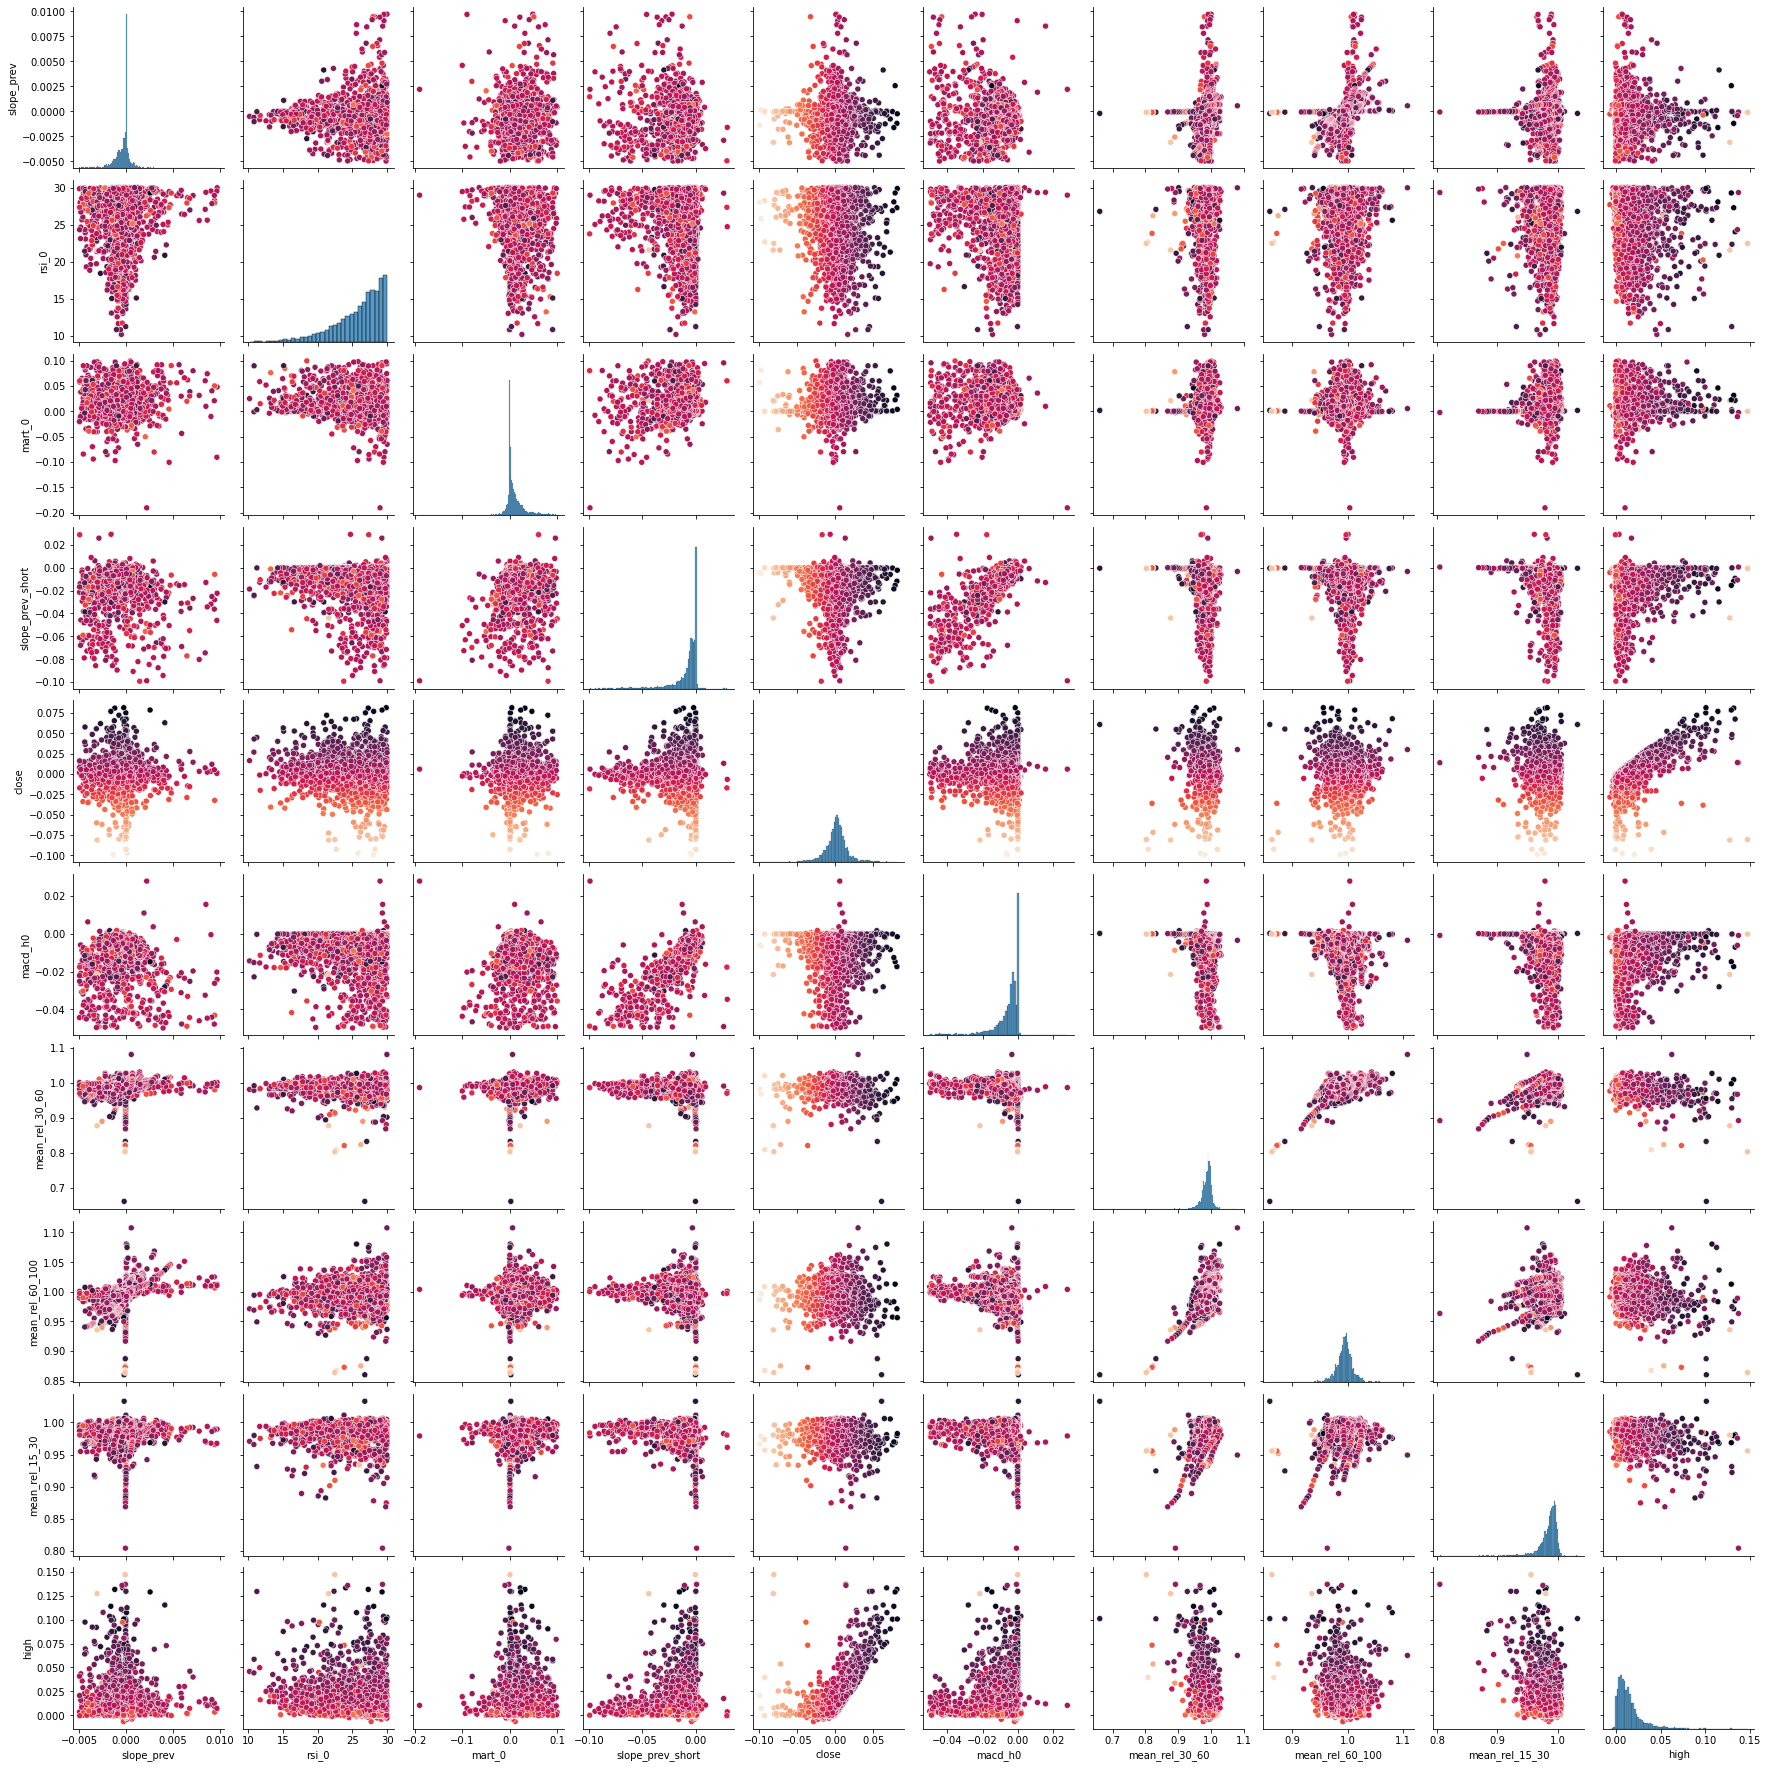

In [116]:
sns.pairplot(file_x[0],
            plot_kws=dict(
            hue = file_x[0]["close"],
            palette = "rocket_r"))


In a first seek we can see that we have sole values like an increment of 0.2 or a decrease of -0.25, that are rare or outliers,  so we need to eliminate them before make the model

In [117]:
file_1 = file
file_1 = file[file["close"] < .1]
file_1 = file_1[file_1["close"] > -.1]
file_1 = file_1[file_1["high"] < .15]
file_1 = file_1[file_1["macd_h0"] < .2] 
file_1 = file_1[file_1["macd_h0"] > -.05]
file_1 = file_1[file_1["macd_s1"] < 0]
#file_1 = file_1[file_1["macd_1"] < 0]
file_1 = file_1[file_1["volume_0"] < 10]
file_1 = file_1[file_1["rsi_0"] < 30]
file_1 = file_1[file_1["mart_0"] < 0.1]
file_1 = file_1[file_1["mart_0"] > -0.2]
file_1 = file_1[file_1["slope_prev_short"] > -0.1]
file_1 = file_1[file_1["slope_prev"] > -0.005]
file_1 = file_1[file_1["slope_prev"] < 0.01]
file_1.describe()


from datetime import datetime

def weekday_convert(row):
    date_time_obj = datetime. strptime(row, '%Y-%m-%d %H:%M:%S')
    return str(date_time_obj.weekday())
def hour_convert(row):
    date_time_obj = datetime. strptime(row, '%Y-%m-%d %H:%M:%S')
    return str(date_time_obj.hour)

file_1["day"] = file_1["date"].apply(weekday_convert)

file_1["hour"] = file_1["date"].apply(hour_convert)

def max_i(row):
    if row > .02:
        return 1
    else:
        return 0
    
file_1["high_3"] = file_1["high"].apply(max_i)

file_2 = file_1.drop(columns =["slope_next_short","close","low","date","high","Unnamed: 0"])


In [118]:
y = file_2["high_3"]
file_3 = file_2.drop(columns=["high_3"])

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection  import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
#.drop(columns=["hour","day"])
for i in file_3.drop(columns=["hour","day"]).columns:
    
    
    sep = (file_3[i].max() - file_3[i].min())/15 
    
    file_3[f"{i}_cut"] = pd.cut(x=file_3[i], bins=[file_3[i].min() + k * sep for k in range(0,16)  ],
                                
                        labels=[-7,-6,-5,-4,-3,-2,-1,0, 1, 2, 3,4,5,6,7])
    

X = pd.get_dummies(file_3)

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.3,random_state = 10)
model = RandomForestClassifier(n_estimators=130, max_depth=90, random_state=1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89       736
           1       0.79      0.30      0.43       221

    accuracy                           0.82       957
   macro avg       0.80      0.64      0.66       957
weighted avg       0.81      0.82      0.79       957



These are the columns we'll use to make the model

 With the "high" value of each candle we can decide if the next ones candels have increase it's prices in a 3% in this case, or just don't

 Once we have the columns with the variables and the target, it's time to create the model.

In [63]:
X = pd.get_dummies(file_3)


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection  import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

 Here we divide our data to train the model and to test it, this is 30% test 70% train

In [64]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.3,random_state = 10)

 To find the best max_depth value, we must iterate through increasing values until find someone that give us the best precision and recall without overfitting the model

In [65]:
model = RandomForestClassifier(n_estimators=130, max_depth=90, random_state=1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     61829
           1       0.71      0.11      0.18      9528

    accuracy                           0.87     71357
   macro avg       0.79      0.55      0.56     71357
weighted avg       0.86      0.87      0.83     71357



 So we find that our searched max_depth value is 90

 Now we can set this to **amplitudes.py**